In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
df_dtype = {'APGAR5': int,
'ATTEND': int,
'BFACIL': int,
'CIG0_R':int,
'DMETH_REC':int,
'DOB_MM':int,
'DOB_TT':int,
'DOB_WK':int,
'ILOP_R':int,
'LBO_REC':int,
'LD_ANES':str,
'LD_INDL':str,
'MAGER':int,
'MAGER9':str,
'ME_PRES':int,
'NO_INFEC':int,
'PAY':int,
'PRECARE':int,
'RESTATUS':int,
'RF_CESARN':str,
'RF_EHYPE':int,
'RF_INFTR':str,
'RF_PPTERM':str,
'SEX':str,
'TBO_REC' :str,
'WTGAIN_REC' :int
}
df_dtype_low = dict((k.lower(), v) for k,v in df_dtype.items())
df_dtype_low


{'apgar5': int,
 'attend': int,
 'bfacil': int,
 'cig0_r': int,
 'dmeth_rec': int,
 'dob_mm': int,
 'dob_tt': int,
 'dob_wk': int,
 'ilop_r': int,
 'lbo_rec': int,
 'ld_anes': str,
 'ld_indl': str,
 'mager': int,
 'mager9': str,
 'me_pres': int,
 'no_infec': int,
 'pay': int,
 'precare': int,
 'restatus': int,
 'rf_cesarn': str,
 'rf_ehype': int,
 'rf_inftr': str,
 'rf_ppterm': str,
 'sex': str,
 'tbo_rec': str,
 'wtgain_rec': int}

In [3]:
#Vital Stats Columns of interest
features = ['APGAR5',
'ATTEND', 
'BFACIL',
'CIG0_R',
'DMETH_REC',
'DOB_MM',
'DOB_TT',
'DOB_WK',
'ILOP_R',
'LBO_REC', 
'LD_ANES', 
'LD_INDL', 
'MAGER',
'MAGER9',
'ME_PRES', 
'NO_INFEC', 
'PAY',
'PRECARE',
'RESTATUS',
'RF_CESARN',
'RF_EHYPE', 
'RF_INFTR', 
'RF_PPTERM', 
'SEX',
'TBO_REC', 'WTGAIN_REC']

feat_set= [x.lower() for x in features]
feat_set

['apgar5',
 'attend',
 'bfacil',
 'cig0_r',
 'dmeth_rec',
 'dob_mm',
 'dob_tt',
 'dob_wk',
 'ilop_r',
 'lbo_rec',
 'ld_anes',
 'ld_indl',
 'mager',
 'mager9',
 'me_pres',
 'no_infec',
 'pay',
 'precare',
 'restatus',
 'rf_cesarn',
 'rf_ehype',
 'rf_inftr',
 'rf_ppterm',
 'sex',
 'tbo_rec',
 'wtgain_rec']

In [4]:
#Testing the importing of the 2018 Vital Statistics Natality Birth Data with selected features
births_2018 = pd.read_csv('/Users/Anu/Desktop/Metis/Online Flex/Classification/natl2018us.csv', nrows=100, usecols=feat_set, iterator=True, chunksize=1000)
births_2018_df = pd.concat(births_2018, ignore_index=True)
births_2018_df.describe()
births_2018_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dob_mm      100 non-null    int64 
 1   dob_tt      100 non-null    int64 
 2   dob_wk      100 non-null    int64 
 3   bfacil      100 non-null    int64 
 4   mager       100 non-null    int64 
 5   mager9      100 non-null    int64 
 6   restatus    100 non-null    int64 
 7   lbo_rec     100 non-null    int64 
 8   tbo_rec     100 non-null    int64 
 9   ilop_r      100 non-null    int64 
 10  precare     100 non-null    int64 
 11  cig0_r      100 non-null    int64 
 12  wtgain_rec  100 non-null    int64 
 13  rf_ehype    100 non-null    object
 14  rf_ppterm   100 non-null    object
 15  rf_inftr    100 non-null    object
 16  rf_cesarn   100 non-null    int64 
 17  no_infec    100 non-null    int64 
 18  ld_indl     100 non-null    object
 19  ld_anes     100 non-null    object
 20  me_pres    

In [5]:
#Importing a random 5% of the population data set with selected features.

p = 0.05  # 20% of the lines
# keep the header, then take only 5% of lines
# if random from [0,1] interval is greater than 0.05 the row will be skipped
natl_2018_sm = pd.read_csv(
        '/Users/Anu/Desktop/Metis/Online Flex/Classification/natl2018us.csv', usecols=feat_set, iterator=True, 
        chunksize=100000, header=0, 
        skiprows=lambda i: i>0 and random.random() > p
)
natl_18_df = pd.concat(natl_2018_sm, ignore_index=True)
natl_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189983 entries, 0 to 189982
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   dob_mm      189983 non-null  int64 
 1   dob_tt      189983 non-null  int64 
 2   dob_wk      189983 non-null  int64 
 3   bfacil      189983 non-null  int64 
 4   mager       189983 non-null  int64 
 5   mager9      189983 non-null  int64 
 6   restatus    189983 non-null  int64 
 7   lbo_rec     189983 non-null  int64 
 8   tbo_rec     189983 non-null  int64 
 9   ilop_r      189983 non-null  int64 
 10  precare     189983 non-null  int64 
 11  cig0_r      189983 non-null  int64 
 12  wtgain_rec  189983 non-null  int64 
 13  rf_ehype    189983 non-null  object
 14  rf_ppterm   189983 non-null  object
 15  rf_inftr    189983 non-null  object
 16  rf_cesarn   189983 non-null  int64 
 17  no_infec    189983 non-null  int64 
 18  ld_indl     189983 non-null  object
 19  ld_anes     189983 non-

In [6]:
#Getting rid of unknown values within the target feature, represented by the number 9
natl_18_df.head(5)
natl_18_df = natl_18_df[natl_18_df.dmeth_rec != 9]
natl_18_df.info()
#New cleaned data only lost 76 rows out of 189,934 rows of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189908 entries, 0 to 189982
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   dob_mm      189908 non-null  int64 
 1   dob_tt      189908 non-null  int64 
 2   dob_wk      189908 non-null  int64 
 3   bfacil      189908 non-null  int64 
 4   mager       189908 non-null  int64 
 5   mager9      189908 non-null  int64 
 6   restatus    189908 non-null  int64 
 7   lbo_rec     189908 non-null  int64 
 8   tbo_rec     189908 non-null  int64 
 9   ilop_r      189908 non-null  int64 
 10  precare     189908 non-null  int64 
 11  cig0_r      189908 non-null  int64 
 12  wtgain_rec  189908 non-null  int64 
 13  rf_ehype    189908 non-null  object
 14  rf_ppterm   189908 non-null  object
 15  rf_inftr    189908 non-null  object
 16  rf_cesarn   189908 non-null  int64 
 17  no_infec    189908 non-null  int64 
 18  ld_indl     189908 non-null  object
 19  ld_anes     189908 non-

# MVP GOAL
Grouping and summarizing the stastical features of the target group Delivery Method (demth_rec) might provide insights into the drivers in the increased rates in C-section births. 

## Features & Descriptions
 ### Field - Description 
    APGAR5 - Five Minute APGAR Score
    ATTEND - Attendant at Birth
    BFACIL - Birth Place
    CIG0_R - Cigarettes Before Pregnancy Recode
    DOB_MM - Birth Month
    DOB_TT - Time of Birth
    DOB_WK - Birth Day of Week
    ILOP_R - Interval Since Last Other Pregnancy Recode
    LBO_REC - Live Birth Order Recode
    LD_ANES - Anesthesia
    LD_INDL - Induction of Labor
    MAGER - Mother’s Single Year of Age
    ME_PRES - Fetal Presentation at Delivery
    NO_INFEC - No Infections Reported
    PAY- Payment Source for Delivery
    PRECARE - Month Prenatal Care Began
    RESTATUS - Residence Status
    RF_CESARN - Previous Cesarean
    RF_EHYP E - Hypertension Eclampsia
    RF_INFTR - Infertility Treatment Used
    RF_PPTERM - Previous Preterm Birth
    SEX - Sex of Infant
    TBO_REC - Total Birth Order 
    WTGAIN_REC - Weight Gain by Mother 

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [8]:
###Lets build our base model, Decision Tree, with our data using unprocessed numerical data first
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
base_natl_df = natl_18_df.select_dtypes(include=numerics)
base_natl_df.head()

,dob_mm,dob_tt,dob_wk,bfacil,mager,mager9,restatus,lbo_rec,tbo_rec,ilop_r,precare,cig0_r,wtgain_rec,rf_cesarn,no_infec,me_pres,dmeth_rec,attend,pay,apgar5
0,1,1626,1,1,21,3,1,1,1,888,3,0,3,0,1,1,1,1,1,9
1,1,754,5,1,24,3,1,2,2,888,2,0,3,1,1,1,2,1,5,9
2,1,1501,3,1,32,5,1,2,2,888,4,0,3,0,1,1,1,1,5,10
3,1,1909,2,1,34,5,2,3,7,23,2,0,5,0,1,1,1,3,1,8
4,1,224,2,1,24,3,1,2,2,888,2,0,2,0,0,1,1,1,1,9


In [9]:
#This function gives us a quick way to try different models with the same 
#train/test split and a uniformly distributed y values
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=38, stratify=y)
    model.fit(xtrain, ytrain)
    return  model.score(xtrain, ytrain), model.score(xtest, ytest)

In [10]:
#Lets build our 1st base model, first we need to define our feature set or X and our target set or y
df_X = base_natl_df.drop(['mager9', 'dmeth_rec', 'apgar5', 'pay','bfacil', 'dob_tt'], axis= 1) 
#dropping the target & features that are determined post birth
df_y = base_natl_df['dmeth_rec']
df_y.head()

0    1
1    2
2    1
3    1
4    1
Name: dmeth_rec, dtype: int64

In [11]:
#Now lets check out our base model Decision tree!
decisiontree = DecisionTreeClassifier()
xtrain, xtest, ytrain, ytest = train_test_split(df_X, df_y, test_size=0.3, random_state=38, stratify=df_y)
decisiontree.fit(xtrain, ytrain)
decisiontree.score(xtrain, ytrain), decisiontree.score(xtest, ytest)
#quick_test(decisiontree, df_X, df_y)

(0.9776582540339264, 0.7360328576694224)

In [12]:
from sklearn import metrics
#Calculate F1 scores just to see 
y_pred = decisiontree.predict(xtest)
F1_base = metrics.f1_score(ytest, y_pred)
F1_base

0.8064752737707659

## The base Decision Tree model has an accuracy score of .98 on the training model and .74 on the test which suggests overfitting, but the F1 score is .809 which is promising. Since our class of interest is only respresented by 22% of the rows in the data we will  address class imbalance and integrate non-numeric features to and move forward with the random tree classifier ensemble model.
### With futher research as which features may be determined prior to birth I've narrowed/expanded the feature set to include the following
    CIG0_R - Cigarettes Before Pregnancy Recode
    DOB_MM - Birth Month
    DOB_WK - Birth Day of Week
    ILOP_R - Interval Since Last Other Pregnancy Recode
    LBO_REC - Live Birth Order Recode
    LD_INDL - Induction of Labor
    MAGER - Mother’s Single Year of Age
    MAGER9 - Mother's Age (binned) 
    NO_INFEC - No Infections Reported
    PRECARE - Month Prenatal Care Began
    RF_CESARN - Previous Cesarean
    RF_EHYP E - Hypertension Eclampsia
    RF_INFTR - Infertility Treatment Used
    RF_PPTERM - Previous Preterm Birth
    SEX - Sex of Infant
    TBO_REC - Total Birth Order 
    WTGAIN_REC - Weight Gain by Mother

In [13]:
#The data set df_X_1 df_y_1 will be extracted from the original cleaned set
df_X_1 = natl_18_df.drop(['apgar5','attend','bfacil','dob_tt','dmeth_rec','mager9', 'me_pres', 'pay',
                          'precare', 'restatus','wtgain_rec'], axis= 1)
df_y_1 = natl_18_df['dmeth_rec']

In [14]:
#Lets split our data into 60%train, 20%validation, and 20% test 
X_train, X_test, y_train, y_test = train_test_split(df_X_1, df_y_1, test_size=0.2, random_state=28, stratify=df_y_1)
X_train,y_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=29)

In [17]:
#Make a list of the categoricals
feat_encode = X_train.columns[X_train.dtypes==object].tolist()


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformerb

col_trans = make_column_transformer((OneHotEncoder(),feat_encode), remainder = "passthrough")

In [19]:
#Lets create a few random forest classifiers with the weights balanced in different ways 
rf = RandomForestClassifier() 
rf_balanced = RandomForestClassifier(class_weight='balanced')
rf_4x = RandomForestClassifier(class_weight={2 : 4, 1 : 1})

In [20]:
#now lets combine the classifiers and constructors and see how we do!
from sklearn.pipeline import make_pipeline
pipe_rf = make_pipeline(col_trans, rf)
pipe_rf_balanced = make_pipeline(col_trans, rf_balanced)
pipe_rf_4x = make_pipeline(col_trans, rf_4x)

In [23]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score, roc_curve
#Now lets see how our random trees fair

pipe_rf.fit(X_train, y_train)
print('Normal Random Forest Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, pipe_rf.predict(X_val)), roc_auc_score(y_val, pipe_rf.predict_proba(X_val)[:,1])))

pipe_rf_balanced.fit(X_train, y_train)
print('Balanced class weights Random Forest Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, pipe_rf_balanced.predict(X_val)), roc_auc_score(y_val, pipe_rf_balanced.predict_proba(X_val)[:,1])))

pipe_rf_4x.fit(X_train, y_train)
print('4:1 class weights Random Forest Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, pipe_rf_4x.predict(X_val)), roc_auc_score(y_val, pipe_rf_4x.predict_proba(X_val)[:,1])))

Normal Random Forest Val F1: 0.835, Val AUC: 0.764
Balanced class weights Random Forest Val F1: 0.816, Val AUC: 0.763
4:1 class weights Random Forest Val F1: 0.801, Val AUC: 0.762


## Oddly enough the normal random tree classifer did the best on our validation set:
    Normal Random Forest Val F1: 0.835, Val AUC: 0.764
    Balanced class weights Random Forest Val F1: 0.816, Val AUC: 0.763
    4:1 class weights Random Forest Val F1: 0.801, Val AUC: 0.762

In [24]:
#Lets see if we can improve the normal random tree model by hypertuning parameters
from pprint import pprint 

print ("Normal Random Tree Classifier currently in use: \n")
pprint (rf.get_params())

Normal Random Tree Classifier currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [25]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2'] #considered number of features at each split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 4, 10]
bootstrap = [True, False]
random_grid = {'max_features': max_features, 'n_estimators': n_estimators, 'max_depth': max_depth, 
               'min_samples_leaf': min_samples_leaf, 
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)), 'bootstrap': bootstrap}
 

In [28]:
rf_2 = RandomForestClassifier(oob_score= True, n_jobs=-1) 
rf_random = RandomizedSearchCV(estimator= rf_2, param_distributions = random_grid, n_iter= 50, cv= 3, verbose= 1, 
                               random_state= 39)
pipe_random = make_pipeline(col_trans, rf_random)
pipe_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/pyth

{'n_estimators': 308,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 38,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [29]:
#Awesome now we can use the best model after tuning and see whether we improve!
#{'n_estimators': 308,
 #'min_samples_leaf': 10,
 #'max_leaf_nodes': 38,
 #'max_features': 'auto',
 #'max_depth': 20,
 #'bootstrap': True}
best_model = rf_random.best_estimator_
pipe_best_model = make_pipeline(col_trans, best_model)
#pipe_best_model.fit(X_train, y_train)
#y_pred_best = pipe_best_model.predict(X_val)
pipe_best_model.fit(X_train, y_train)
print('Best Model Random Forest Validation F1: %.3f, Validation AUC: %.3f' % \
      (f1_score(y_val, pipe_best_model.predict(X_val)), roc_auc_score(y_val, pipe_best_model.predict_proba(X_val)[:,1])))

Best Model Random Forest Validation F1: 0.868, Validation AUC: 0.809


## After hyperparameter tuning we have an f1 score of .868 or 87% and ROC AUC score of .81 or 81% an improvement from our previous trials: Normal Random Forest Val F1: 0.835, Val AUC: 0.764

In [34]:
#Before we use the best model on our test data set lets examine the features and see what else we might try. 
def encode_bind(og_df, feat_encode):
    dummies = pd.get_dummies(og_df[feat_encode]) 
    res = pd.concat([dummies, og_df], axis=1)
    res = res.drop(feat_encode, axis=1)
    return(res)

X_train_encode = encode_bind(X_train, feat_encode)

important_feat = list(zip(X_train_encode, rf.feature_importances_))
ranked_important_feat = sorted(important_feat, key= lambda x:x[1], reverse = True)
[print('Feature: {:40} Importance: {}'.format(*pair)) for pair in ranked_important_feat];

Feature: rf_cesarn                                Importance: 0.28498986099839213
Feature: mager                                    Importance: 0.19646734247977574
Feature: dob_mm                                   Importance: 0.16683208771928945
Feature: dob_wk                                   Importance: 0.10378777182294371
Feature: ilop_r                                   Importance: 0.0591559947859762
Feature: lbo_rec                                  Importance: 0.04399527798249414
Feature: tbo_rec                                  Importance: 0.041489403209046205
Feature: cig0_r                                   Importance: 0.02424357209113134
Feature: ld_indl_Y                                Importance: 0.016641401727944274
Feature: ld_indl_N                                Importance: 0.014435022821396061
Feature: ld_anes_Y                                Importance: 0.00854082676630321
Feature: ld_anes_N                                Importance: 0.008445076580537487
Feature: no_i

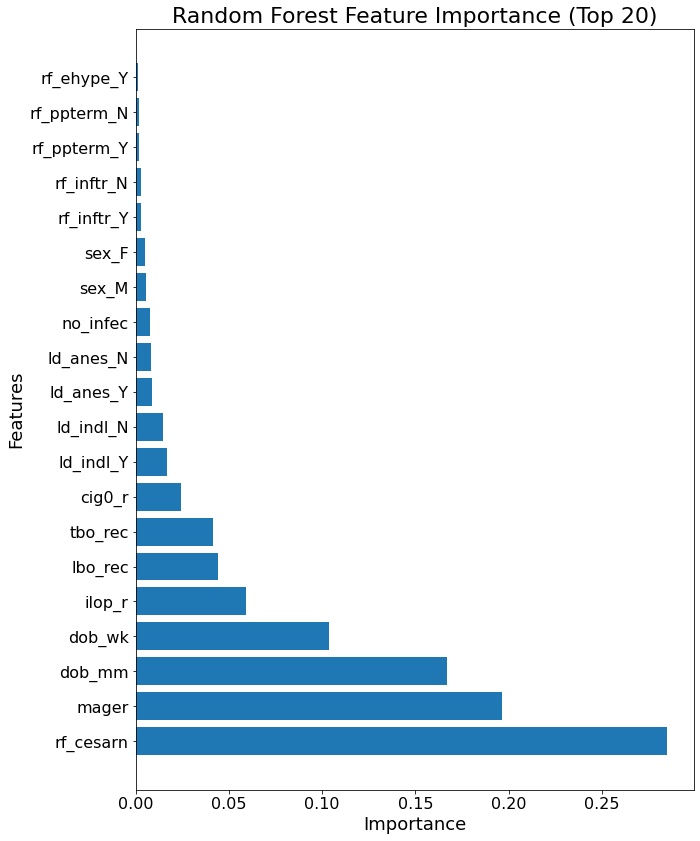

In [70]:
#Lets plot the features...
feat_named_25 = [i[0] for i in ranked_important_feat[:20]]
y_tick =np.arange(0, len(feat_named_25))
x_axis = [i[1] for i in ranked_important_feat[:20]]
plt.figure(figsize= (10, 14))
plt.barh(feat_named_25, x_axis)
plt.title("Random Forest Feature Importance (Top 20)", fontdict= {'fontsize': 22})
plt.ylabel("Features", fontdict = {'fontsize' : 18 })
plt.xlabel("Importance", fontdict = {'fontsize' : 18 })                                   
plt.show()

In [40]:
y_pred_val = pipe_best_model.predict(X_val)
rf_probs_val = pipe_best_model.predict_proba(X_val)[:,1]
y_pred_train = pipe_best_model.predict(X_train)
rf_probs_train = pipe_best_model.predict_proba(X_train)[:,1]



In [63]:
#ROC Curve, Confusion Matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
def eval_model(y_pred, probs, train_pred, train_probs):
    
    baseline = {}
    baseline['recall'] = recall_score(y_val, [1 for _ in range(len(y_val))])
    baseline['precision'] = precision_score(y_val, [1 for _ in range(len(y_val))])
    baseline['roc'] = .5
    results = {}
    results['recall'] = recall_score(y_val, y_pred)
    results['precision']= precision_score(y_val, y_pred)
    results ['roc'] = roc_auc_score(y_val, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_pred)
    train_results['precision'] = precision_score(y_train, train_pred)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Validation: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    base_fpr, base_tpr, _ = roc_curve(y_val, [1 for _ in range(len(y_val))], pos_label=2)
    model_fpr, model_tpr, _ = roc_curve(y_val, probs, pos_label=2)
    plt.figure(figsize = (8,6))
    plt.rcParams['font.size'] = 16
    
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel ('False + Rate')
    plt.xlabel ('True Positive Rate'); plt.title('ROC Curves')
    plt.show;
               

Recall Baseline: 1.0 Validation: 0.97 Train: 0.97
Precision Baseline: 0.68 Validation: 0.78 Train: 0.78
Roc Baseline: 0.5 Validation: 0.81 Train: 0.81


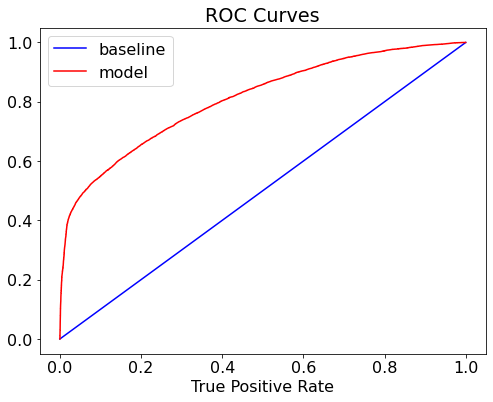

In [64]:
eval_model(y_pred_val, rf_probs_val, y_pred_train, rf_probs_train)


In [60]:
#Finaly lets run the best model on the test data and check performance 

print('Best Model Random Forest Test F1: %.3f, TEST AUC: %.3f' % \
      (f1_score(y_test, pipe_best_model.predict(X_test)), 
       roc_auc_score(y_test, pipe_best_model.predict_proba(X_test)[:,1])))







Best Model Random Forest Validation F1: 0.867, TEST AUC: 0.806


## After hyperparameter tuning we have an f1 score of .868 or 87% and ROC AUC score of .81 or 81% on the validation set, an improvement from our previous trials: Normal Random Forest Val F1: 0.835, Val AUC: 0.764. THE FINAL F1 for the test data set is: 87% and the AUC is .806 or 81%

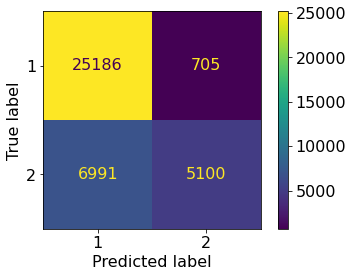

In [67]:
#Confusion Matrix
cm = confusion_matrix(y_test, pipe_best_model.predict(X_test), labels=pipe_best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_best_model.classes_)
disp.plot()
plt.show()
